In [1]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install nlpaug

In [32]:
import gensim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 100)
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re

from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import os

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\zahin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\zahin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\zahin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\zahin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\zahin\AppData\Roaming\nltk_data...
[nltk_data]    | 

ImportError: cannot import name 'Adam' from 'keras.optimizers' (C:\Notebook\lib\site-packages\keras\optimizers.py)

In [67]:
# importing nplaug

import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

In [68]:
# Loading word2vec model
!pip install wget
import gzip
import shutil
import wget
import os

gn_vec_path = "GoogleNews-vectors-negative300.bin"
if not os.path.exists("GoogleNews-vectors-negative300.bin"):
    if not os.path.exists("../Ch3/GoogleNews-vectors-negative300.bin"):
        # Downloading the reqired model
        if not os.path.exists("../Ch3/GoogleNews-vectors-negative300.bin.gz"):
            if not os.path.exists("GoogleNews-vectors-negative300.bin.gz"):
                wget.download("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz")
            gn_vec_zip_path = "GoogleNews-vectors-negative300.bin.gz"
        else:
            gn_vec_zip_path = "../Ch3/GoogleNews-vectors-negative300.bin.gz"
        # Extracting the required model
        with gzip.open(gn_vec_zip_path, 'rb') as f_in:
            with open(gn_vec_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
    else:
        gn_vec_path = "../Ch3/" + gn_vec_path

print(f"Model at {gn_vec_path}")

Model at GoogleNews-vectors-negative300.bin


In [38]:
# Choosing which model to use for data augmentation
# model_type: word2vec, glove or fasttext
aug = naw.WordEmbsAug(
    model_type='word2vec', model_path=gn_vec_path,
    action="substitute")

In [39]:
text = 'The quick brown fox jumps over the lazy dog .'
print(text)

The quick brown fox jumps over the lazy dog .


In [69]:
# Trying out an example
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
Today MEDTOX_develops brown fox jumps over the lazy dog.


In [41]:
# Loading data
df2 = pd.read_csv(r"D:\E\Baikka\Project\New data\KEC SAC radiology data for CS 8.3.2022.csv",encoding='unicode_escape')
df2['mr_report'] = df2['mr_report'].astype(str)

df2.head()

,Outcome,mr_report
0,0,Reason for Exam: CHRONIC LOWER BACK PAIN. GETTING WORSE WITH TIME. AFFECTING THE PATIENT'S LIF...
1,0,Narrative & Impression MR LUMBAR SPINE Reason for Exam: KNOWN MULTILEVEL DEGENERATIVE DISC ...
2,0,MR LUMBAR SPINE Reason for Exam: PROGRESSIVELY WORSENING RT SIDED LOWER BACK AND RT LEG BU...
3,0,"MR CERVICAL SPINE Reason for Exam: HAS HX OF MVA, SEVERE NECK AND BACK PAIN. NUMBNESS, WEAK..."
4,0,MRI lumbar spine Comparison: No prior Technique: Routine MRI of the lumbar spine FIN...


In [70]:
# Original Shape
df2.shape

(1162, 3)

In [43]:
text1 = df2.iloc[0]['mr_report']
text1

"Reason for Exam: CHRONIC LOWER BACK PAIN.  GETTING WORSE WITH TIME.  AFFECTING THE PATIENT'S LIFE QUALITY.  LS-SPINE X-RAY SHOWED SPONDYLOLISTHESIS AND SEVERE DEGENERATIVE CHANGES.  \xa0  MRI OF THE LUMBAR SPINE  \xa0  TECHNIQUE: Routine MRI of the lumbar spine.  \xa0  FINDINGS: There is a defect in the pars interarticularis of L5 bilaterally with grade 1 spondylolytic spondylolisthesis L5 on S1 identified. Approximately 10 mm of anterolisthesis of L5 on S1 demonstrated. The alignment of the posterior margins of the rest the lumbar vertebrae maintained. There are Modic endplate changes present at the L5-S1 level. There are focal lesions of T1 and T2 hyperintensity arising within the T12, L1 and L4 vertebral bodies likely representing small hemangiomas. No osseous destructive lesion. No compression fracture.  \xa0  The spinal cord terminates at the T12-L1 disc interspace level with conus medullaris and cauda equina appearing normal.  \xa0  L3-4 level: Minor desiccation with borderline 

In [44]:
aug.aug_p=0.2
print("Augmented Text:")
for ii in range(5):
    augmented_text = aug.augment(text1)
    print(augmented_text)

Augmented Text:
Reason for Exam: CHRONIC LOWER BACK PAIN. GETTING WORSE WITH TIME. AFFECTING THE_CURRENT PATIENT ' S LIFE QUALITY. LS - SPINE X - RAY SHOWED SPONDYLOLISTHESIS AND SEVERE DEGENERATIVE CHANGES. MRI OF THE LUMBAR SPINE TECHNIQUE: Routine MRI of the lumbar spine. FINDINGS: There is a defect in the pars interarticularis of L5 bilaterally brings grade 1 spondylolytic spondylolisthesis L5 on S1 identified. Approximately 10 mm of anterolisthesis of L5 on S1 demonstrated. The alignment of the posterior margins of the rest the lumbar vertebrae maintained. There are Modic endplate changes present at the L5 - S1 level. There all focal lesions of T1 and T2 hyperintensity arising within the T12, L1 and L4 vertebral bodies likely representing small hemangiomas. No osseous destructive lesion. No compression fracture. The spinal cord terminates at the T12 - L1 disc interspace level with conus medullaris and cauda equina appearing normality. L3 - 4 level: Minor desiccation with borderlin

In [45]:
train,valid=train_test_split(df2,test_size=0.15)
print('Shape of train',train.shape)
print("Shape of Validation ",valid.shape)

Shape of train (647, 2)
Shape of Validation  (115, 2)


In [71]:
# Data Augmentation for positive labels
from sklearn.utils import shuffle

def augment_text(df,samples=300,pr=0.2):
    aug.aug_p=pr
    new_text=[]
    
    ##dropping samples from validation
    df_n=df[df.Outcome==1].reset_index(drop=True)

    ## data augmentation loop
    for i in tqdm(np.random.randint(0,len(df_n),samples)):
        
            text = df_n.iloc[i]['mr_report']
            augmented_text = aug.augment(text)
            new_text.append(augmented_text)
    
    
    ## dataframe
    new=pd.DataFrame({'mr_report':new_text,'Outcome':1})
    df=shuffle(df.append(new).reset_index(drop=True))
    return df

In [47]:
train = augment_text(train,samples=400)   ## change samples to 0 for no augmentation
df2 = train.append(valid).reset_index(drop=True)

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [24:14<00:00,  3.64s/it]


In [72]:
# New dataframe shape
df2.shape


(1162, 3)

In [49]:
df2.to_csv('Full_SACv2.csv')

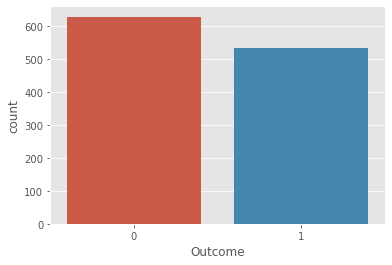

In [73]:
# No more class imbalance
ax = sns.countplot(x="Outcome", data=df2)

In [51]:
df2['text_clean'] = df2['mr_report'].apply(lambda x: gensim.utils.simple_preprocess(x))
df2.head()

,Outcome,mr_report,text_clean
0,0,"Reason for Exam: CHRONIC, RECURRENT SEVERE LOWER BACKCAHE, STIFFNESS NEVE ROOT IMPINGMENT? ...","[reason, for, exam, chronic, recurrent, severe, lower, backcahe, stiffness, neve, root, impingme..."
1,1,TECHNIQUE: Sagittal T1 and T2 images of the lumbosacral spine were obtained with axial T1 and T2...,"[technique, sagittal, and, images, of, the, lumbosacral, spine, were, obtained, with, axial, and..."
2,0,"TECHNIQUE: Noncontrast MRI of the lumbar spine protocol, with sagittal T1 and T2 sequences th...","[technique, noncontrast, mri, of, the, lumbar, spine, protocol, with, sagittal, and, sequences, ..."
3,1,Narrative & Impression MR LUMBAR SPINE Reason for Exam: PLEASSANT LADY WITH A PAST HX OF BREAST ...,"[narrative, impression, mr, lumbar, spine, reason, for, exam, pleassant, lady, with, past, hx, o..."
4,0,MR THORACIC SPINE Reason for Exam: RECURRENT LOWER THORACIC AND LUMBAR PAIN x 1 YEAR. ...,"[mr, thoracic, spine, reason, for, exam, recurrent, lower, thoracic, and, lumbar, pain, year, ra..."


In [62]:
X_train, X_test, y_train, y_test = train_test_split (df2['text_clean'], df2['Outcome'] , test_size=0.15)

In [63]:
w2v_model = gensim.models.Word2Vec(X_train, vector_size=100, window=5, min_count=2)

In [64]:
# Generate aggregated sentence vectors based on the word vectors for each word in the sentence

words = set(w2v_model.wv.index_to_key )
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_train])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_test])

C:\Users\zahin\AppData\Local\Temp/ipykernel_3552/621311441.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_train])
C:\Users\zahin\AppData\Local\Temp/ipykernel_3552/621311441.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_test])


In [65]:
# Computing sentence vectors by averaging the word vectors for the words contained in the sentence

X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [66]:
# fit the training dataset on the LR
lr = LogisticRegressionCV(cv=5, max_iter = 10000, class_weight = 'balanced', random_state=0)
lr.fit(X_train_vect_avg, y_train.values.ravel())

# predicting the labels on validation dataset
predictions_LR = lr.predict(X_test_vect_avg)

print("LR Accuracy Score -> ",accuracy_score(predictions_LR, y_test)*100)
print("F1-Score -> ",f1_score(predictions_LR, y_test))

LR Accuracy Score ->  69.14285714285714
F1-Score ->  0.6707317073170732
